<h1>Analise de dados da App Store</h1>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
appstore_df = pd.read_csv('./AppleStore.csv')

In [6]:
#cinco primeiras linhas
appstore_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [7]:
#Tipos de dados
appstore_df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [8]:
#linhas e colunas
print(f'Linhas: {len(appstore_df.index)}')
print(f'Colunas: {len(appstore_df.columns)}')

Linhas: 7197
Colunas: 17


In [9]:
#Checando duplicatas
def is_missing(data, column):
    if any(data.duplicated()) == True:
        print(f'Há valores duplicadosd na coluna {column}')
    else:
        print(f'Não há valores duplicados na coluna {column}')

In [10]:
#Remoção das duplicatas
appstore_df.drop_duplicates(subset='track_name', keep=False, inplace=True)
appstore_df.reset_index(drop=True)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7189,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7190,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7191,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [11]:
#checagem
is_missing(appstore_df.track_name, 'track_name')

Não há valores duplicados na coluna track_name


In [12]:
#verificando se há valores faltantes
appstore_df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [13]:
#removendo valores iguais a 0
appstore_df = appstore_df.query('user_rating != 0')


[Text(0.5, 1.0, 'Categorias com maior número de aplicativos'),
 Text(0.5, 0, 'Categorias'),
 Text(0, 0.5, 'Quantidade')]

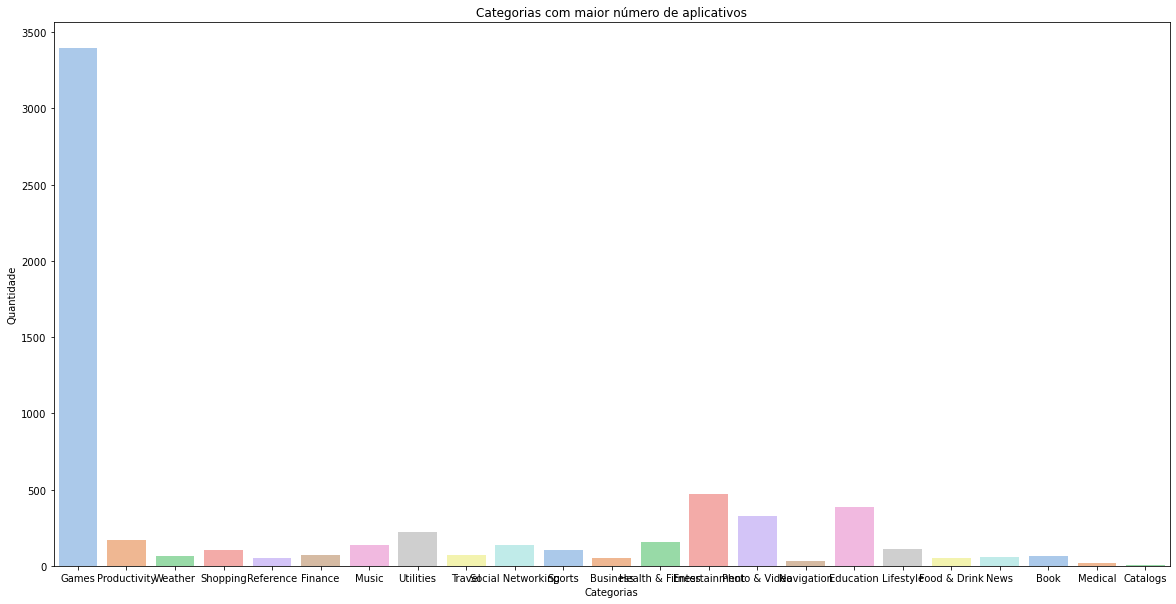

In [14]:
#gráfico com as categorias com maior número de apps
plt.figure(figsize=(20,10))
fig = sns.countplot(x=appstore_df.prime_genre, palette='pastel')
fig.set(title='Categorias com maior número de aplicativos', xlabel='Categorias', ylabel='Quantidade')

In [15]:
#claramente a categoria games possui um alto número de aplicativos

In [30]:
#Top 10 jogos gratuitos com mais classificações
top_free_games = appstore_df[(appstore_df['prime_genre']=='Games') & (appstore_df['price']==0)]
top_free_games = top_free_games.sort_values(by='rating_count_tot', ascending=False)[['track_name', 'rating_count_tot', 'user_rating', 'price']].head(n=10)

[Text(0.5, 1.0, 'Top 10 jogos gratuitos'),
 Text(0.5, 0, 'Classificação'),
 Text(0, 0.5, 'Jogos')]

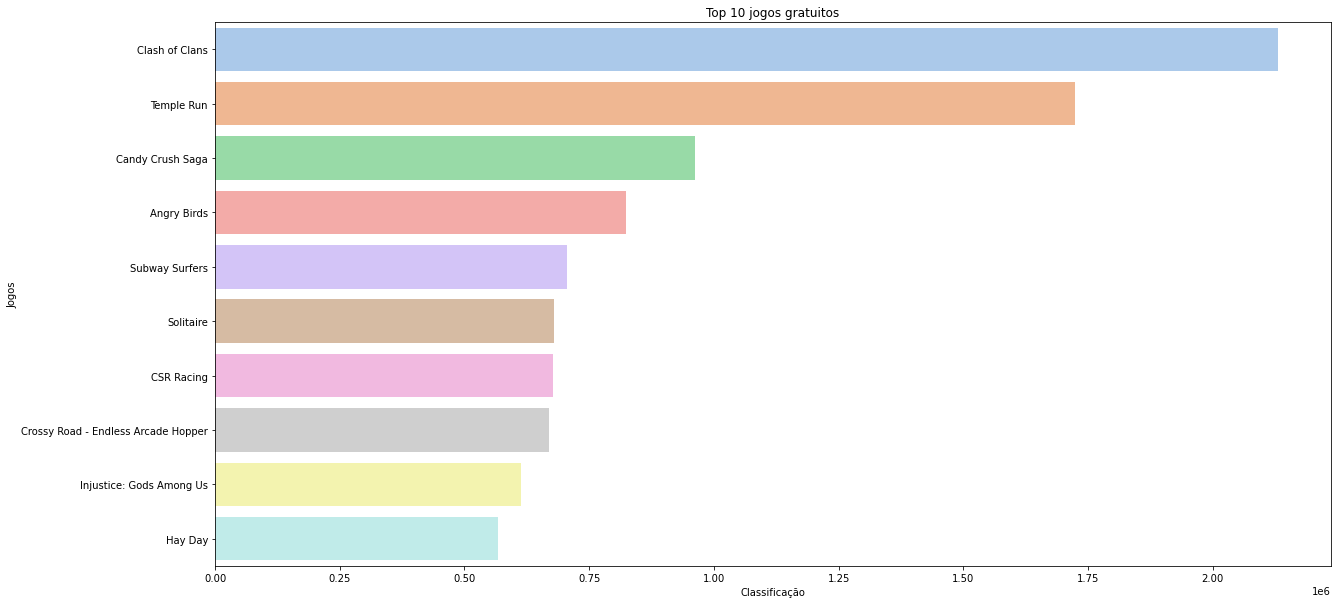

In [31]:
plt.figure(figsize=(20,10))
top_free_games_fig = sns.barplot(x=top_free_games['rating_count_tot'][:10], y=top_free_games['track_name'][:10],palette='pastel')
top_free_games_fig.set(title='Top 10 jogos gratuitos', xlabel='Classificação', ylabel='Jogos')


In [32]:
#Top 10 jogos pagos mais baixados
top_pay_games = appstore_df[(appstore_df['prime_genre']=='Games') & (appstore_df['price']!=0)]
top_pay_games = top_pay_games.sort_values(by='rating_count_tot', ascending=False)[['track_name', 'rating_count_tot', 'user_rating', 'price']]

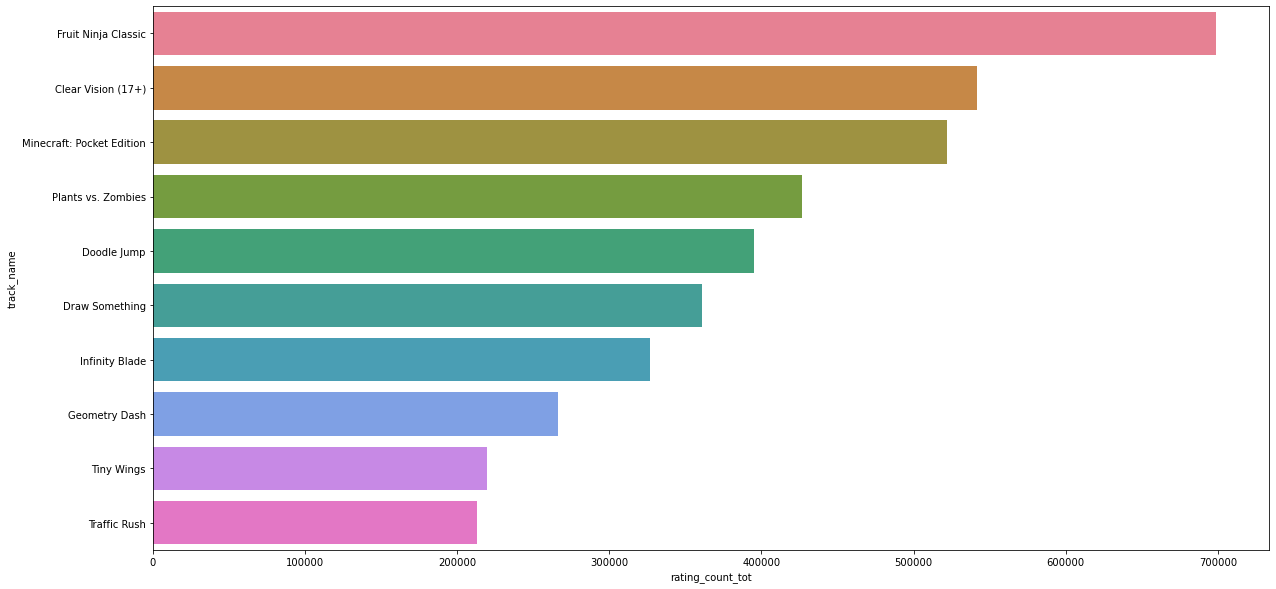

In [33]:
plt.figure(figsize=(20,10))
top_pay_games_fig = sns.barplot(x=top_pay_games['rating_count_tot'][:10], y=top_pay_games['track_name'][:10], palette='husl')

In [44]:
#Aplicativos com mais avaliações
top_apps = appstore_df[appstore_df['prime_genre'] != 'Games']
top_apps = top_apps.sort_values(by='rating_count_tot',ascending=False)
top_apps.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
519,591,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
755,863,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
4,5,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
178,202,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1
265,299,341232718,Calorie Counter & Diet Tracker by MyFitnessPal,152700928,USD,0.0,507706,181,4.5,4.5,7.16,4+,Health & Fitness,37,5,19,1
53,62,295646461,"The Weather Channel: Forecast, Radar & Alerts",199734272,USD,0.0,495626,5893,3.5,4.5,8.11,4+,Weather,37,0,33,1
12,13,284815942,Google – Search made just for mobile,179979264,USD,0.0,479440,203,3.5,4.0,27.0,17+,Utilities,37,4,33,1
45,53,293622097,Google Earth,37214208,USD,0.0,446185,1359,3.5,3.5,7.1.6,4+,Travel,43,5,30,1


[Text(0.5, 1.0, 'Apps com mais avaliações'),
 Text(0.5, 0, 'Classificações'),
 Text(0, 0.5, 'Aplicativos')]

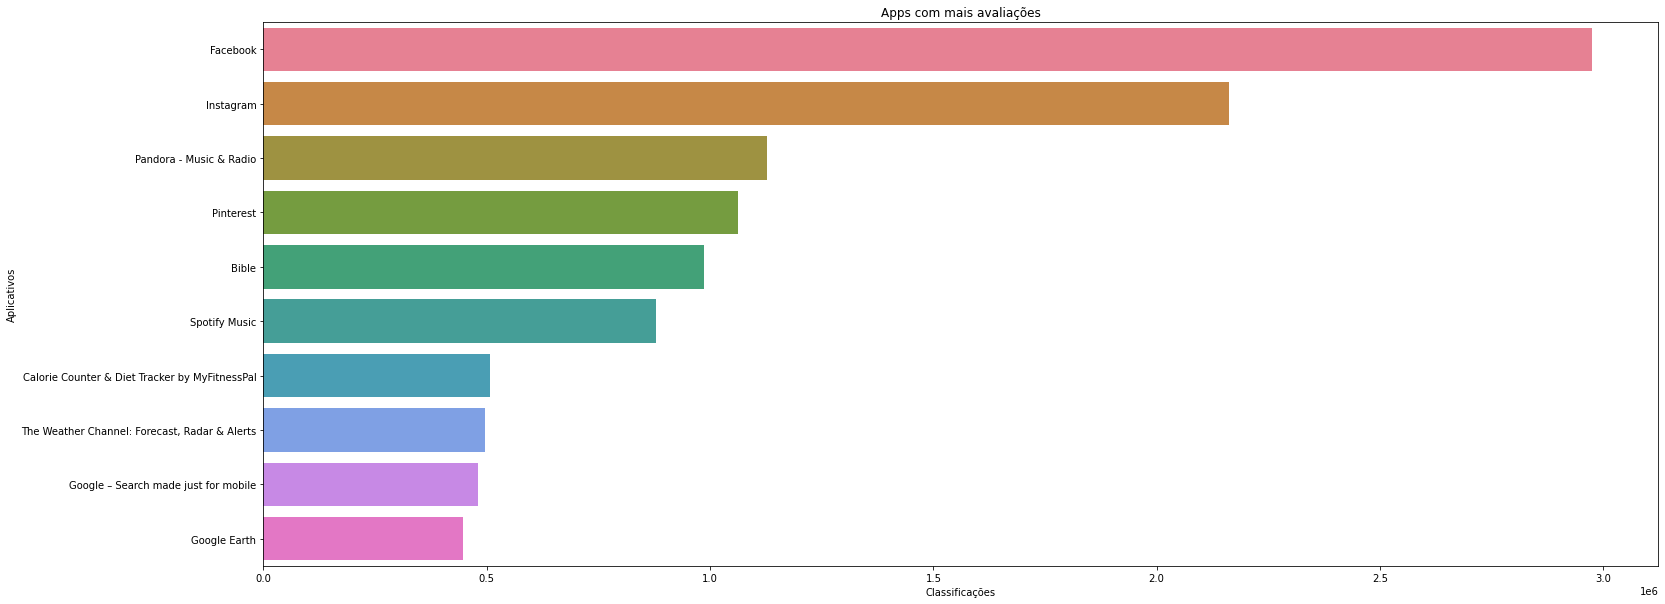

In [45]:
plt.figure(figsize=(25,10))
top_apps_fig = sns.barplot(x=top_apps['rating_count_tot'][:10], y=top_apps['track_name'][:10],palette='husl')
top_apps_fig.set(title='Apps com mais avaliações', xlabel='Classificações', ylabel='Aplicativos')

[Text(0.5, 1.0, 'Pagos X Gratuitos'),
 Text(0.5, 0, 'Tipo'),
 Text(0, 0.5, 'Quantidade')]

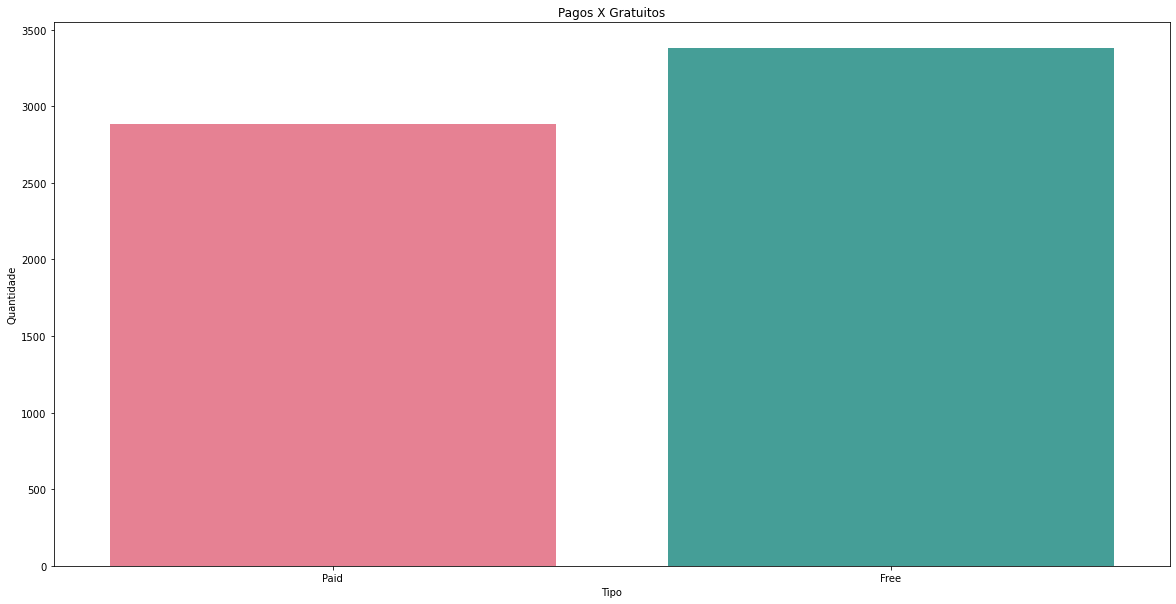

In [46]:
#Comparação entre pagos e gratuitos
plt.figure(figsize=(20,10))
figure = sns.countplot(x=appstore_df.price.apply(lambda x: 'Free' if x == 0 else 'Paid'),palette='husl')
figure.set(title='Pagos X Gratuitos', xlabel='Tipo', ylabel='Quantidade')